## 1. Data Preparation

In [8]:
import pandas as pd
import numpy as np

In [9]:
df_inflation = pd.read_csv('datasets/Inflation1.csv')
df_gdp = pd.read_csv('datasets/GDP.csv')

In [10]:
df_inflation = df_inflation[df_inflation['REF_AREA_NAME'] == 'South Africa'].reset_index()
df_gdp = df_gdp[df_gdp['REF_AREA_NAME'] == 'South Africa'].reset_index()

drop_cols = [
    'REF_AREA_ID','FREQ_ID', 'index', 'FREQ_NAME', 'INDICATOR_ID', 'UNIT_MEASURE_ID', 'AGG_METHOD_ID', 'INDICATOR_ID','INDICATOR_NAME', 'UNIT_MEASURE_ID', 
    'UNIT_MEASURE_NAME','AGG_METHOD_ID', 'AGG_METHOD_NAME', 'DECIMALS_ID', 'DECIMALS_NAME','DATABASE_ID_ID','DATABASE_ID_NAME', 'COMMENT_TS', 
    'UNIT_MULT_ID','UNIT_MULT_NAME', 'DATA_SOURCE_ID', 'DATA_SOURCE_NAME', 'OBS_STATUS_ID',	'OBS_STATUS_NAME','OBS_CONF_ID','OBS_CONF_NAME'
    ]

df_gdp = df_gdp.drop(columns=drop_cols)
df_inflation = df_inflation.drop(columns=drop_cols)

for df in [df_gdp, df_inflation]:
    df.rename(columns={'REF_AREA_NAME': 'Country'}, inplace=True)

df_gdp.fillna(df_gdp.mean(numeric_only=True), inplace=True)
df_inflation.fillna(df_inflation.mean(numeric_only=True), inplace=True)

df_inflation


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,South Africa,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,3.489234,3.538992,1.986136,...,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909


In [11]:
inflation_long = df_inflation.melt(
    id_vars='Country',
    var_name='Year',
    value_name='Inflation'
)

gdp_long = df_gdp.melt(
    id_vars='Country',
    var_name='Year',
    value_name='GDP'
)

inflation_long['Year'] = inflation_long['Year'].astype(int)
gdp_long['Year'] = gdp_long['Year'].astype(int)

merged_df = pd.merge(inflation_long, gdp_long, on=['Country', 'Year'])

merged_df

,Country,Year,Inflation,GDP
0,South Africa,1961,2.102374,3.844734
1,South Africa,1962,1.246285,6.177931
2,South Africa,1963,1.337970,7.373709
3,South Africa,1964,2.534973,7.939609
4,South Africa,1965,4.069029,6.122798
...,...,...,...,...
58,South Africa,2019,4.120246,0.259936
59,South Africa,2020,3.210036,-6.168918
60,South Africa,2021,4.611672,4.955033
61,South Africa,2022,7.039727,1.911480


In [12]:
merged_df.describe()

,Year,Inflation,GDP
count,63.000000,63.000000,63.000000
mean,1992.000000,7.839404,2.786620
std,18.330303,4.565871,2.640099
min,1961.000000,-0.692030,-6.168918
25%,1976.500000,4.528904,1.277710
50%,1992.000000,6.425708,3.014480
75%,2007.500000,11.339223,4.563252
max,2023.000000,18.654919,7.939609


## 2. Numerical Analysis

In [13]:
years = merged_df['Year'].to_numpy()
inflation = merged_df['Inflation'].to_numpy()
gdp = merged_df['GDP'].to_numpy()

### Inflation Stats

In [14]:
inf_mean = round(np.mean(inflation), 2)
inf_std = round(np.std(inflation), 2)
inf_min = round(np.min(inflation), 2)
inf_max = round(np.max(inflation), 2)

In [15]:
inf_mean 

7.84

In [16]:
inf_std 

4.53

In [17]:
inf_min

-0.69

In [18]:
inf_max

18.65

### GDP Stats

In [19]:
gdp_mean = round(np.mean(gdp), 2)
gdp_std = round(np.std(gdp), 2)
gdp_min = round(np.min(gdp), 2)
gdp_max = round(np.max(gdp), 2)

In [20]:
gdp_mean

2.79

In [21]:
gdp_std

2.62

In [22]:
gdp_min

-6.17

In [23]:
gdp_max

7.94

### Correlation between GDP and Inflation over the years

In [24]:
corr = np.corrcoef(gdp, inflation)[0,1]
corr

-0.34762233428258915

### Year over Year changes in Inflation and GDP

In [25]:
gdp_yoy = np.diff(gdp)
infl_yoy = np.diff(inflation)

In [26]:
gdp

array([ 3.84473414,  6.17793085,  7.37370925,  7.93960864,  6.1227981 ,
        4.43838609,  7.19652307,  4.15337298,  4.71590287,  5.24866143,
        4.2789344 ,  1.65482971,  4.57194475,  6.1111221 ,  1.69543378,
        2.24986033, -0.09397912,  3.01447978,  3.79051926,  6.62058343,
        5.36079106, -0.38341911, -1.84655775,  5.09915163, -1.21154088,
        0.01784924,  2.10072902,  4.20010965,  2.39479512, -0.31776043,
       -1.01824497, -2.13703285,  1.23355794,  3.2       ,  3.1       ,
        4.3       ,  2.6       ,  0.5       ,  2.4       ,  4.2       ,
        2.7       ,  3.7003744 ,  2.94907547,  4.55455991,  5.27705197,
        5.60380646,  5.36047405,  3.19104389, -1.53808914,  3.03973288,
        3.16855628,  2.39623238,  2.48546801,  1.41382645,  1.32186224,
        0.66455231,  1.15794695,  1.55678385,  0.25993558, -6.16891771,
        4.95503259,  1.91147996,  0.69848519])

In [27]:
gdp_yoy.round(2)

array([ 2.33,  1.2 ,  0.57, -1.82, -1.68,  2.76, -3.04,  0.56,  0.53,
       -0.97, -2.62,  2.92,  1.54, -4.42,  0.55, -2.34,  3.11,  0.78,
        2.83, -1.26, -5.74, -1.46,  6.95, -6.31,  1.23,  2.08,  2.1 ,
       -1.81, -2.71, -0.7 , -1.12,  3.37,  1.97, -0.1 ,  1.2 , -1.7 ,
       -2.1 ,  1.9 ,  1.8 , -1.5 ,  1.  , -0.75,  1.61,  0.72,  0.33,
       -0.24, -2.17, -4.73,  4.58,  0.13, -0.77,  0.09, -1.07, -0.09,
       -0.66,  0.49,  0.4 , -1.3 , -6.43, 11.12, -3.04, -1.21])

In [28]:
gdp_yoy = gdp_yoy.reshape(-1,1)
infl_yoy = infl_yoy.reshape(-1,1)


### Separating arrays into Apartheid and Post-Apartheid to analyse the mean between the two periods


In [29]:
apartheid_mask = years <= 1993
post_apartheid_mask = years >= 1994

gdp_apartheid = gdp[apartheid_mask]
gdp_post = gdp[post_apartheid_mask]


infl_apartheid = inflation[apartheid_mask]
infl_post = inflation[post_apartheid_mask]


mean_gdp_apartheid = np.mean(gdp_apartheid)
mean_gdp_post = np.mean(gdp_post)
mean_infl_apartheid = np.mean(infl_apartheid)
mean_infl_post = np.mean(infl_post)


In [30]:
mean_gdp_apartheid

3.1696298036175694

In [31]:
mean_gdp_post

2.3653091325703604

In [32]:
mean_infl_apartheid

9.738035678853393

In [33]:
mean_infl_post

5.750910182010203

### Analysing extreme years for Inflation and GDP

In [34]:
worst_gdp_year = years[np.argmin(gdp)]
best_gdp_year = years[np.argmax(gdp)]
worst_inf_year = years[np.argmax(inflation)]
best_inf_year = years[np.argmin(inflation)]


In [35]:
worst_gdp_year

2020

In [36]:
best_gdp_year


1964

In [37]:
worst_inf_year

1986

In [38]:
best_inf_year

2004

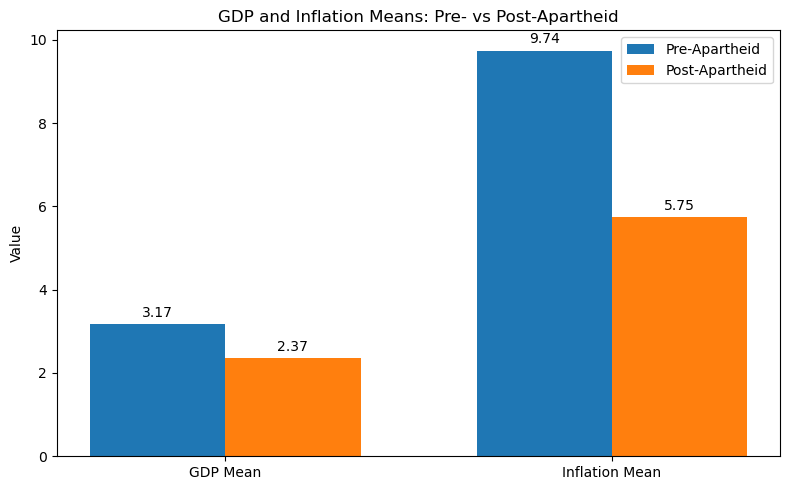

In [ ]:
import matplotlib.pyplot as plt

# Stats for pre- and post-apartheid eras
labels = ['GDP Mean', 'Inflation Mean']
pre_apartheid = [mean_gdp_apartheid, mean_infl_apartheid]
post_apartheid = [mean_gdp_post, mean_infl_post]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, pre_apartheid, width, label='Pre-Apartheid')
rects2 = ax.bar(x + width/2, post_apartheid, width, label='Post-Apartheid')


ax.set_ylabel('Value')
ax.set_title('GDP and Inflation Means: Pre- vs Post-Apartheid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

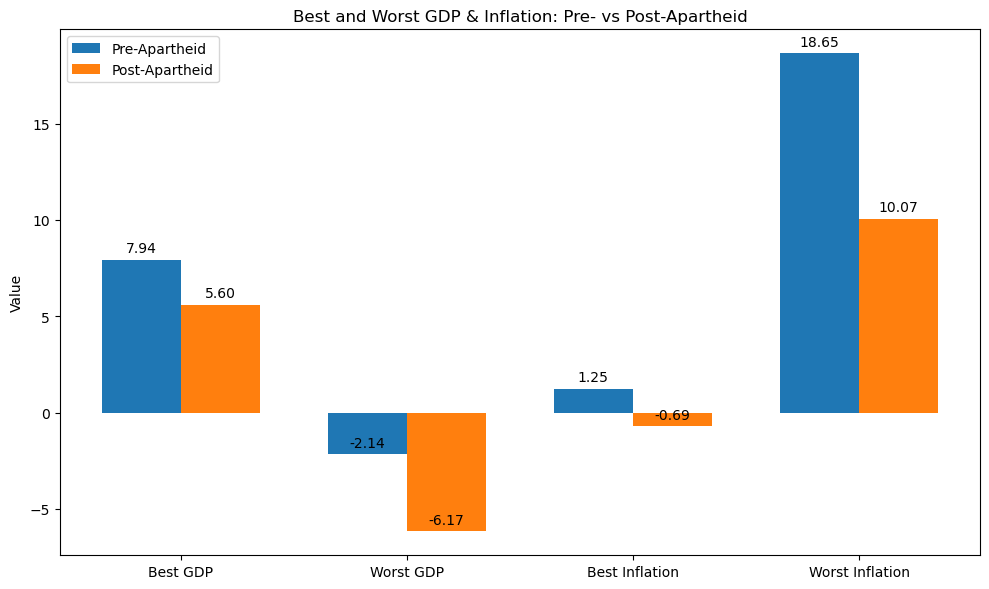

In [41]:
import matplotlib.pyplot as plt

# Pre-Apartheid stats
best_gdp_apartheid = np.max(gdp_apartheid)
worst_gdp_apartheid = np.min(gdp_apartheid)
best_inf_apartheid = np.min(infl_apartheid)
worst_inf_apartheid = np.max(infl_apartheid)

# Post-Apartheid stats
best_gdp_post = np.max(gdp_post)
worst_gdp_post = np.min(gdp_post)
best_inf_post = np.min(infl_post)
worst_inf_post = np.max(infl_post)

labels = ['Best GDP', 'Worst GDP', 'Best Inflation', 'Worst Inflation']
pre_apartheid_stats = [best_gdp_apartheid, worst_gdp_apartheid, best_inf_apartheid, worst_inf_apartheid]
post_apartheid_stats = [best_gdp_post, worst_gdp_post, best_inf_post, worst_inf_post]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pre_apartheid_stats, width, label='Pre-Apartheid')
rects2 = ax.bar(x + width/2, post_apartheid_stats, width, label='Post-Apartheid')

ax.set_ylabel('Value')
ax.set_title('Best and Worst GDP & Inflation: Pre- vs Post-Apartheid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()